In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df1 = df.loc[:, ["Age","Annual Income (k$)"]]

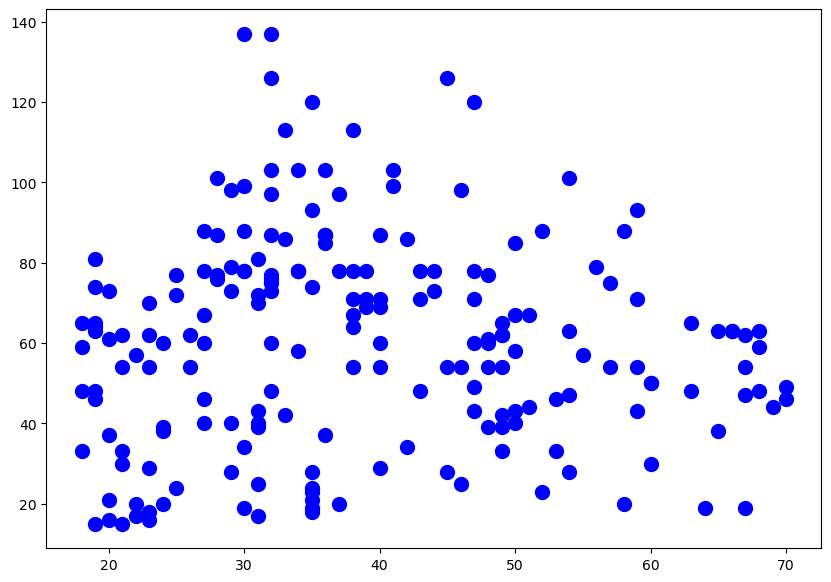

In [19]:
plt.figure(figsize=(10, 7))
plt.scatter(df1[["Age"]], datasubset[["Annual Income (k$)"]], s=100, c='blue')
plt.show()

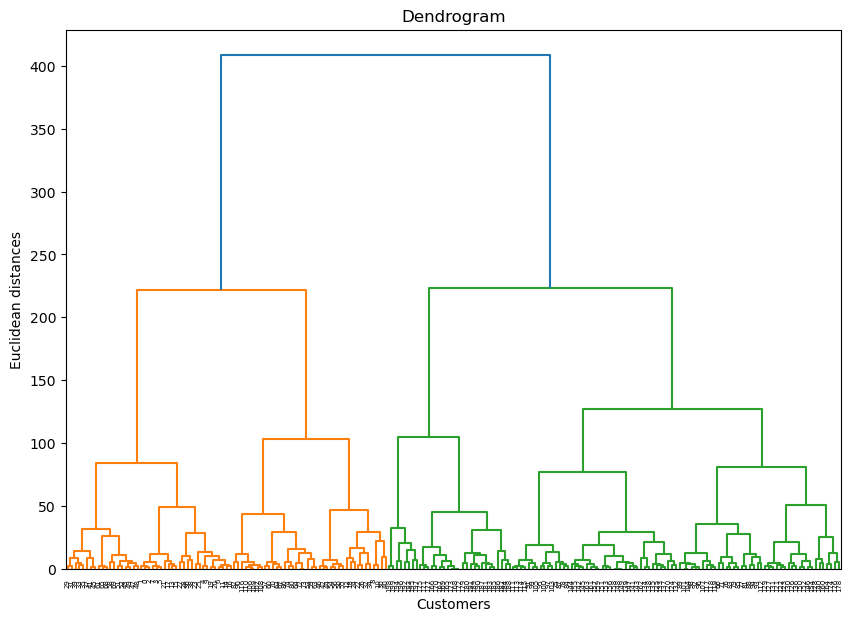

In [21]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))


dendrogram = sch.dendrogram(sch.linkage(datasubset, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#check for largest distance vertically without crossing any horizontal line

In [29]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')  
cluster.fit_predict(df1)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [31]:
cl = cluster.fit_predict(datasubset)

In [33]:
from sklearn.metrics import silhouette_score

In [35]:
silhouette_score(datasubset,cl)

0.4104652474372429

In [38]:
X = datasubset.values

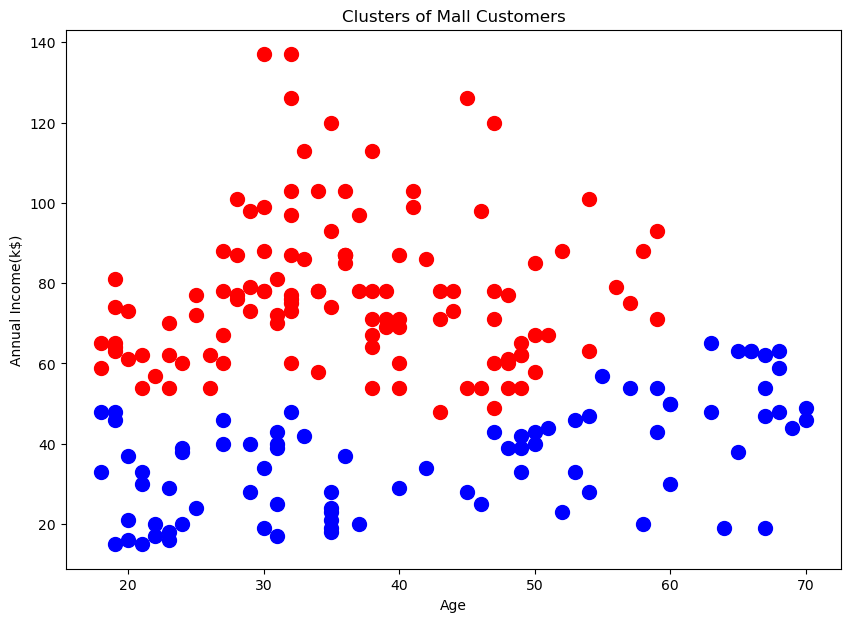

In [40]:
plt.figure(figsize=(10, 7))  
plt.scatter(X[cl==0, 0], X[cl==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[cl==1, 0], X[cl==1, 1], s=100, c='blue', label ='Cluster 2')
plt.title('Clusters of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income(k$)')
plt.show()

In [42]:
#trying DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

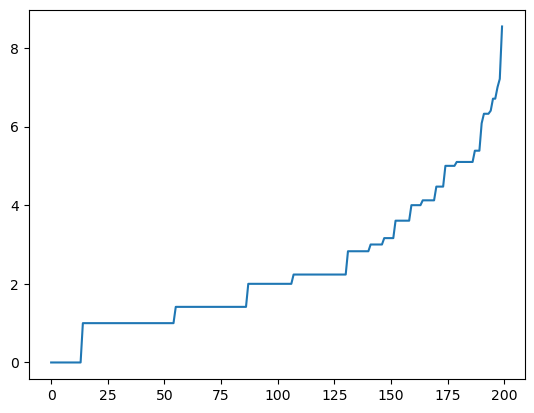

In [58]:
distances = np.sort(distances)  # Sorting the 1D array
plt.plot(distances)
plt.show()

In [66]:
from sklearn.cluster import DBSCAN
dbscancluster = DBSCAN(eps=7, min_samples=5)
dbscancluster.fit(X)
clusters = dbscancluster.labels_

In [64]:
len(set(clusters))

3

In [68]:
silhouette_score(X,clusters)

0.28705019416571775

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

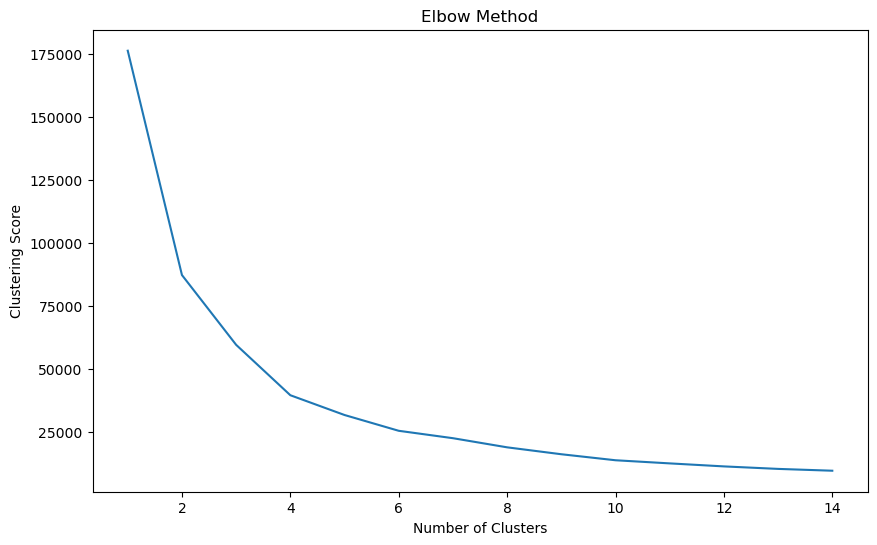

In [70]:
from sklearn.cluster import KMeans
#try kmeans
individual_clustering_score = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    individual_clustering_score.append(kmeans.inertia_) 
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 15), individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [72]:
#Fit the model and predict
kmeans= KMeans(n_clusters = 2, random_state = 42)

kmeans.fit(X)

pred = kmeans.predict(X)

pred

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [74]:
silhouette_score(X,pred)

0.42300000631806584

In [78]:
from sklearn.preprocessing import normalize
scaled = normalize(X)  # Normalize the data
scaled = pd.DataFrame(scaled)  # Convert normalized data into a DataFrame
scaled.head()  # Display the first few rows of the scaled data

,0,1
0,0.784883,0.619644
1,0.813733,0.581238
2,0.780869,0.624695
3,0.820905,0.571064
4,0.876812,0.480833


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Text(0, 0.5, 'Clustering Score')

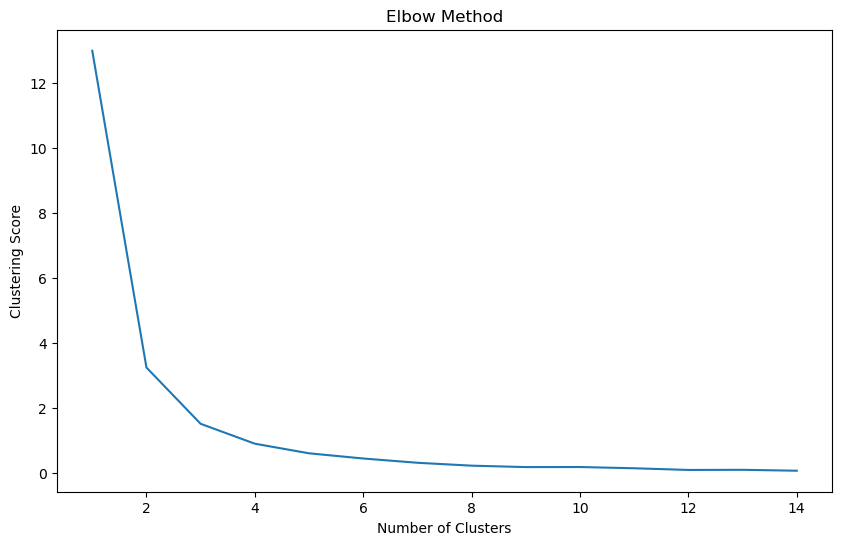

In [88]:
individual_clustering_score = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(scaled)
    individual_clustering_score.append(kmeans.inertia_) 
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 15), individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [94]:
#Fit the model and predict
kmeans= KMeans(n_clusters = 2, random_state = 42)


kmeans.fit(scaled)


pred = kmeans.predict(scaled)

pred

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [90]:
score = silhouette_score(scaled, pred)
print( score)

0.642036722568442
